## Challenge code
 
 In the code below, you are given a couple functions:
 
 - `shor`: a QNode that contains the operations required to define Shor's code given an initial `state` and an `error` occuring in the middle of the circuit. It must output the expectation value of the Pauli Z operator on each qubit. **You must complete this function**.
 - `error`: this function contains the error operator that will be introduced into the circuit you create with `shor`. The possible errors are Pauli X, Y, and Z errors (see `error_dict`). To call this within `shor`, simply write `error(error_key, qubit)` and it will apply the error!
 
 Here are some helpful resources:
 
 - [Shor code](https://en.wikipedia.org/wiki/Quantum_error_correction#Shor_code)
 - [Quantum error correction](https://en.wikipedia.org/wiki/Quantum_error_correction)
 
 ### Input 
 
 As input to this problem, you are given:
 
 - `state` (`list(float)`): defines the initial one-qubit state $\vert \psi \rangle$. The remaining 8 qubits are initialized in the $\vert 0 \rangle$ state.
 - `error_key` (`int`): an integer corresponding to a Pauli X, Y, or Z error. See `error_dict`.
 - `qubit` (`int`): an integer corresponding to which qubit the error will occur on.
 
 ### Output
 
 This code must output a `list(float)` corresponding to the expectation values of the Pauli Z operator on every qubit.
 
 If your solution matches the correct one within the given tolerance specified in `check` (in this case it's a `1e-4` relative error tolerance), the output will be `"Correct!"` Otherwise, you will receive a `"Wrong answer"` prompt.
 
 Good luck!
 ### Imports
 The cell below specifies the libraries you should use in this challenge. Run the cell to import the libraries. ***Do not modify the cell.***

In [9]:
import json
import pennylane as qml
from pennylane import numpy as np
import array as arr

### Code
 Complete the code below. Note that during QHack, some sections were not editable. We've marked those sections accordingly here, but you can still edit them if you wish.

In [10]:
n_qubits = 9
dev = qml.device("default.qubit", wires=n_qubits)
error_dict = {0: 'PauliX', 1: 'PauliY', 2: 'PauliZ'}

def error(error_key, qubit):
    """Defines the error that is induced in the circuit.

    Args:
        error_key (int): An integer associated to the type of error (Pauli X, Y, or Z)
        qubit (int): The qubit that the error occurs on.
    """
    getattr(qml, error_dict[error_key])(qubit)

@qml.qnode(dev)
def shor(state, error_key, qubit):
    """A circuit defining Shor's code for error correction.

    Args:
        state (list(float)): The quantum state of the first qubit in the circuit.
        error_key (int): An integer associated to the type of error (Pauli X, Y, or Z)
        qubit (int): The qubit that the error occurs on.

    Returns:
        (list(float)): The expectation value of the Pauli Z operator on every qubit.
    """
    qml.QubitStateVector(np.array(state), wires=0)

    # End of uneditable section #
    qml.CNOT([0,3])
    qml.CNOT([0,6])
    for i in range(n_qubits):
        if(i%3==0):
            qml.Hadamard(wires=i)
            qml.CNOT([i,i+1])
            qml.CNOT([i,i+2])

    error(error_key,qubit)

    for i in range(n_qubits):
        if(i%3==0):
            qml.CNOT([i,i+1])
            qml.CNOT([i,i+2])
            qml.Toffoli([i+2,i+1,i])
            qml.Hadamard(wires=i)
    
    qml.CNOT([0,3])
    qml.CNOT([0,6])

    qml.Toffoli([6,3,0])
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]
    # Put your code here #

(<Figure size 1700x1000 with 1 Axes>, <Axes: >)
-0.9999999999999991 0.9999999999999991 0.9999999999999991 -0.9999999999999991 -0.9999999999999991 0.9999999999999991 0.9999999999999991 0.9999999999999991 0.9999999999999991


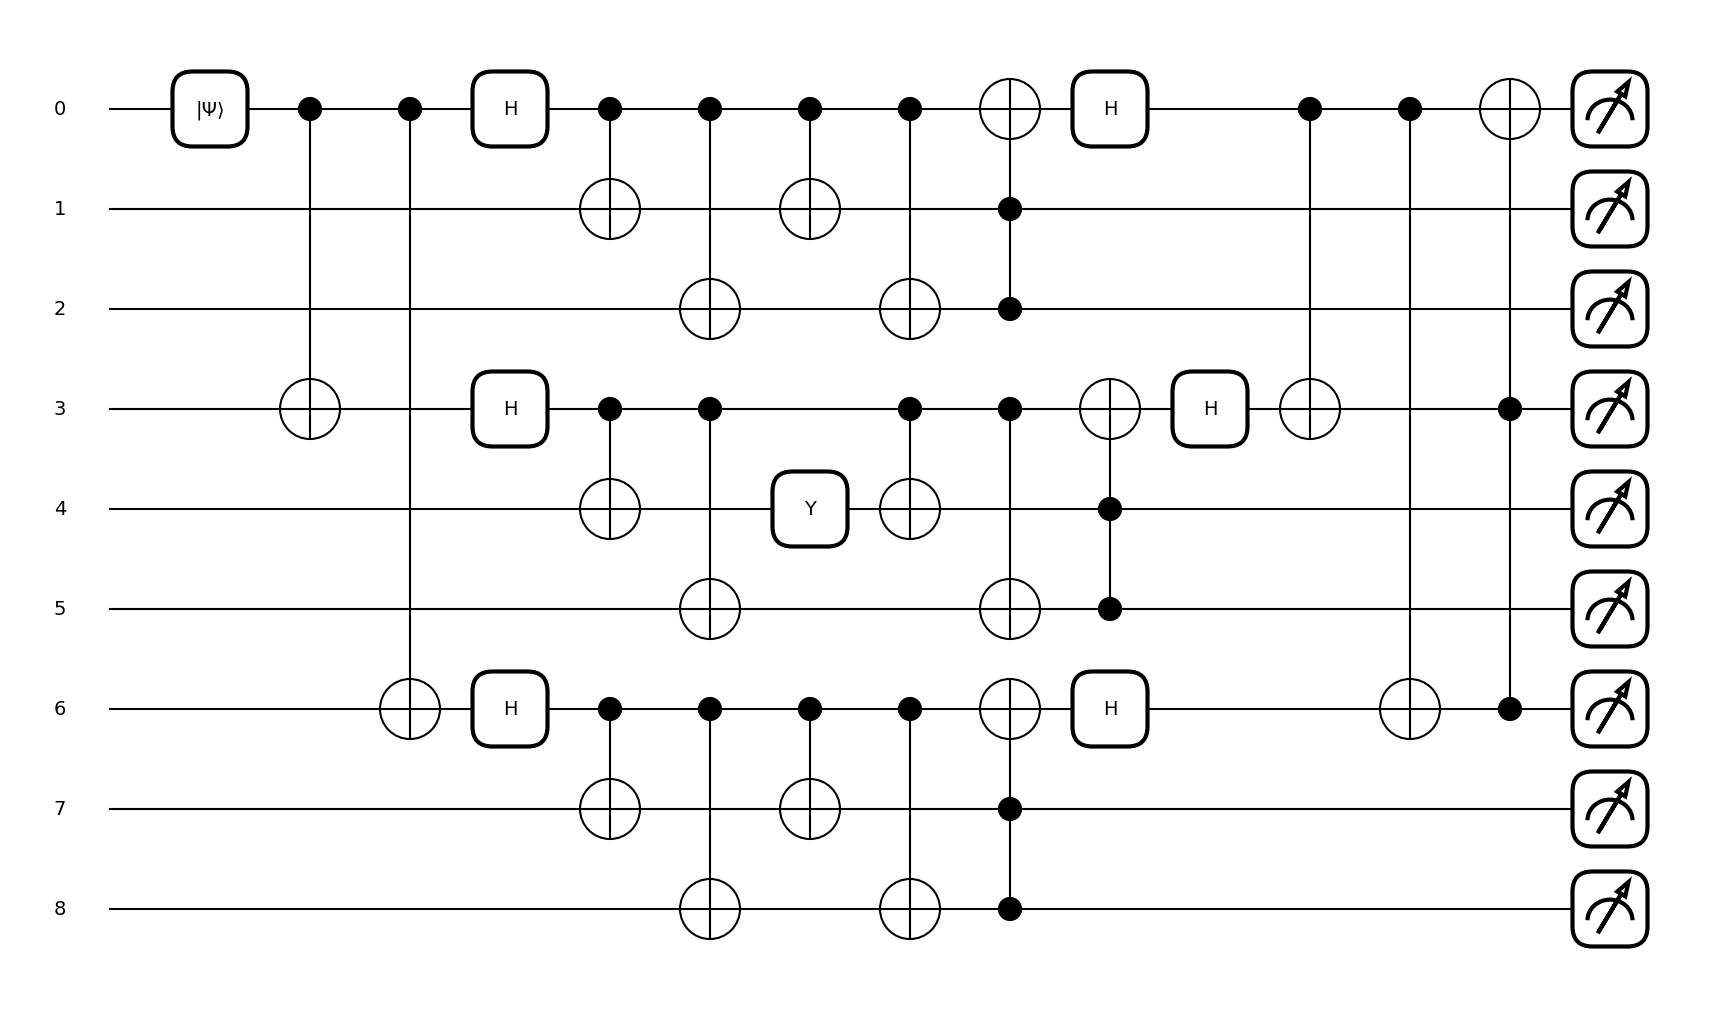

In [11]:
state=[0,1]
error_key=1

print(qml.draw_mpl(shor)(state,error_key,4))
print(*shor(state,error_key,4))

These functions are responsible for testing the solution. You will need to run the cell below. ***Do not modify the cell.***

In [12]:
def run(test_case_input: str) -> str:
    state, error_key, qubit = json.loads(test_case_input)
    output = shor(state, error_key, qubit).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-4)

### Test cases
 Running the cell below will load the test cases. ***Do not modify the cell***.
 - input: [[0, 1], 0, 3]
 	+ expected output: [-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]
 - input: [[0.5, 0.8660254038], 2, 1]
 	+ expected output: [-0.5, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0]

In [13]:
test_cases = [['[[0, 1], 0, 3]', '[-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]'], ['[[0.5, 0.8660254038], 2, 1]', '[-0.5, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0]']]

### Solution testing
 Once you have run every cell above, including the one with your code, the cell below will test your solution. Run the cell. If you are correct for all of the test cases, it means your solutions is correct. Otherwise, you need to double check your work. ***Do not modify the cell below.***

In [14]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[0, 1], 0, 3]'...
Runtime Error. 'list' object has no attribute 'tolist'
Running test case 1 with input '[[0.5, 0.8660254038], 2, 1]'...
Runtime Error. 'list' object has no attribute 'tolist'
